In [149]:
import pandas as pd
df = pd.read_csv('csvFiles/AVERAGE TEMPERATURE.csv',parse_dates=['PERIOD'])
#Check for Null values in data set and remove values
print(df.isnull().sum())
#New data set
df = df.dropna()
print()
print('Shape of data',df.shape)
print()
print(df.isnull().sum())
df

PERIOD                 0
AverageTemperature    38
dtype: int64

Shape of data (1882, 2)

PERIOD                0
AverageTemperature    0
dtype: int64


,PERIOD,AverageTemperature
0,1853-01-01,24.219
1,1853-02-01,23.765
2,1853-03-01,25.812
3,1853-04-01,26.842
4,1853-05-01,27.647
...,...,...
1915,2012-08-01,27.586
1916,2012-09-01,27.328
1917,2012-10-01,26.862
1918,2012-11-01,27.144


In [141]:
#Separete month and year from PERIOD field / create dummy fields
df['PERIOD'] = pd.to_datetime(df['PERIOD'])
df['Year'] = df['PERIOD'].dt.year

In [142]:
#get rows with year values greater than 2012
invalidValues = df[df['Year'] > 2012 ].index
#Drop rows with invalid values
df.drop(invalidValues , inplace=True)
df

,PERIOD,AverageTemperature,Year
0,1853-01-01,24.219,1853
1,1853-02-01,23.765,1853
2,1853-03-01,25.812,1853
3,1853-04-01,26.842,1853
4,1853-05-01,27.647,1853
...,...,...,...
1915,2012-08-01,27.586,2012
1916,2012-09-01,27.328,2012
1917,2012-10-01,26.862,2012
1918,2012-11-01,27.144,2012


<AxesSubplot:>

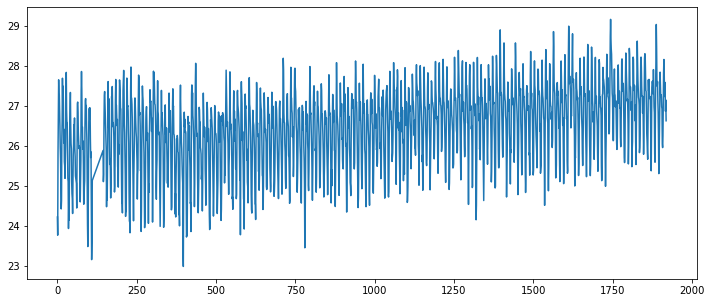

In [150]:
#df.drop(['Year'], axis = 1)
df['AverageTemperature'].plot(figsize=(12,5))


In [151]:
#Check if data is stationary based on the P-value,P-value should be less than 0.5 to be stationary 
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['AverageTemperature'])

1. ADF :  -2.677104349430863
2. P-Value :  0.07808470275021684
3. Num Of Lags :  25
4. Num Of Observations Used For ADF Regression: 1856
5. Critical Values :
	 1% :  -3.433878215107907
	 5% :  -2.8630985090913432
	 10% :  -2.56759969475745


In [152]:
#Look for best model based on AIC Score
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['AverageTemperature'], trace=True,suppress_warnings=True)

In [157]:
#Set Training and testing data with 80-20 partition
print(df.shape)
train = df.iloc[:-80]
test = df.iloc[-400:]
print(train.shape,test.shape)

(1882, 2)
(1802, 2) (400, 2)


In [158]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AverageTemperature'],order=(2,1,5))
model=model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:>

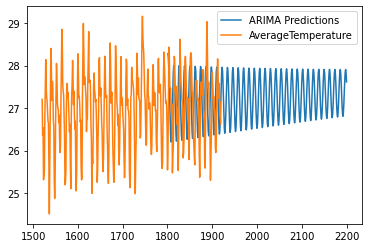

In [159]:
start=len(train)
end=len(train)+len(test)-1
pred = model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['AverageTemperature'].plot(legend=True)

In [145]:
df['Year']

0       1853
1       1853
2       1853
3       1853
4       1853
        ... 
1915    2012
1916    2012
1917    2012
1918    2012
1919    2012
Name: Year, Length: 1186, dtype: int64

In [147]:
df['PERIOD']

0      1853-01-01
1      1853-02-01
2      1853-03-01
3      1853-04-01
4      1853-05-01
          ...    
1915   2012-08-01
1916   2012-09-01
1917   2012-10-01
1918   2012-11-01
1919   2012-12-01
Name: PERIOD, Length: 1186, dtype: datetime64[ns]